In [1]:
from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
     

In [2]:
# Paths to the dataset
train_path = "C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/train"
test_path = "C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/test"

In [3]:
# Create directories
os.makedirs("/content/Train/Fake", exist_ok=True)
os.makedirs("/content/Train/Real", exist_ok=True)
os.makedirs("/content/Test/Fake", exist_ok=True)
os.makedirs("/content/Test/Real", exist_ok=True)

In [4]:

def copy_files(src_dir, dst_dir_fake, dst_dir_real):
    print(f"Checking files in {src_dir}")
    for item in os.listdir(src_dir):
        item_path = os.path.join(src_dir, item)
        if os.path.isfile(item_path):  # Check if it's a regular file
            if item.lower().endswith(('.jpg', '.jpeg', '.png')):  # Check if it's a valid image file
                if item.lower().endswith("_forg.jpg") or item.lower().endswith("_forg.jpeg") or item.lower().endswith("_forg.png"):  # Check if filename ends with "_forg"
                    dst_file = os.path.join(dst_dir_fake, item)
                    print(f"Copying {item_path} to {dst_file}")
                    shutil.copy(item_path, dst_file)
                else:
                    dst_file = os.path.join(dst_dir_real, item)
                    print(f"Copying {item_path} to {dst_file}")
                    shutil.copy(item_path, dst_file)
            else:
                print(f"Skipping {item_path}, not a valid image file")
        elif os.path.isdir(item_path):  # Check if it's a directory
            if item.lower().endswith("_forg"):  # Check if directory name ends with "_forg"
                dst_dir = os.path.join(dst_dir_fake, item)  # Destination directory in the "Fake" folder
                print(f"Copying directory {item_path} to {dst_dir}")
                shutil.copytree(item_path, dst_dir, dirs_exist_ok=True)
            else:
                dst_dir = os.path.join(dst_dir_real, item)  # Destination directory in the "Real" folder
                print(f"Copying directory {item_path} to {dst_dir}")
                shutil.copytree(item_path, dst_dir, dirs_exist_ok=True)
        else:
            print(f"Skipping {item_path}, not a file or directory")

In [5]:
# Example usage for the training dataset
train_src_dir = "C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/train"
train_dst_dir_fake = "C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/train/full_forg"
train_dst_dir_real = "C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/train/full_org"

# Copy files for training dataset
copy_files(train_src_dir, train_dst_dir_fake, train_dst_dir_real)

Checking files in C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/train
Copying directory C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/train\full_forg to C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/train/full_forg\full_forg
Copying directory C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/train\full_org to C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/train/full_org\full_org


In [6]:
# Check if directories contain images
train_fake_images = os.listdir("C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/train/full_forg")
train_real_images = os.listdir("C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/train/full_org")
test_fake_images = os.listdir("C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/test/full_forg")
test_real_images = os.listdir("C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/test/full_org")

# Print the contents of each directory
print(f"Train/Fake: {train_fake_images}")
print(f"Train/Real: {train_real_images}")
print(f"Test/Fake: {test_fake_images}")
print(f"Test/Real: {test_real_images}")

if len(train_fake_images) == 0 or len(train_real_images) == 0 or len(test_fake_images) == 0 or len(test_real_images) == 0:
    raise ValueError("One of the directories is empty. Please check the paths and ensure images are correctly copied.")

Train/Fake: ['forgeries_10_1.png', 'forgeries_10_10.png', 'forgeries_10_11.png', 'forgeries_10_12.png', 'forgeries_10_13.png', 'forgeries_10_14.png', 'forgeries_10_15.png', 'forgeries_10_16.png', 'forgeries_10_17.png', 'forgeries_10_18.png', 'forgeries_10_19.png', 'forgeries_10_2.png', 'forgeries_10_20.png', 'forgeries_10_21.png', 'forgeries_10_22.png', 'forgeries_10_23.png', 'forgeries_10_24.png', 'forgeries_10_3.png', 'forgeries_10_4.png', 'forgeries_10_5.png', 'forgeries_10_6.png', 'forgeries_10_7.png', 'forgeries_10_8.png', 'forgeries_10_9.png', 'forgeries_11_1.png', 'forgeries_11_10.png', 'forgeries_11_11.png', 'forgeries_11_12.png', 'forgeries_11_13.png', 'forgeries_11_14.png', 'forgeries_11_15.png', 'forgeries_11_16.png', 'forgeries_11_17.png', 'forgeries_11_18.png', 'forgeries_11_19.png', 'forgeries_11_2.png', 'forgeries_11_20.png', 'forgeries_11_21.png', 'forgeries_11_22.png', 'forgeries_11_23.png', 'forgeries_11_24.png', 'forgeries_11_3.png', 'forgeries_11_4.png', 'forgeries_

In [7]:

# Directories for training and testing
train_dir = "C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/train"
test_dir = "C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/test"

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Apply augmentation to the generator
train_generator_augmented = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)
     

Found 10560 images belonging to 2 classes.


In [10]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)
     


Found 2640 images belonging to 2 classes.


In [11]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(100, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(130, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(426, activation='relu'),
    Dropout(0.5),
    Dense(300, activation='relu'),  # Adjusted dense layer size
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


C:\Users\aravi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)


In [13]:
# Check the number of samples
num_train_samples = train_generator_augmented.samples
num_test_samples = test_generator.samples



# Calculate steps_per_epoch and validation_steps based on the number of samples
steps_per_epoch = num_train_samples // 64
validation_steps = num_test_samples // 64

# Ensure steps_per_epoch and validation_steps are at least 1
steps_per_epoch = max(steps_per_epoch, 1)
validation_steps = max(validation_steps, 1)

print(f'Steps per epoch: {steps_per_epoch}')
print(f'Validation steps: {validation_steps}')

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator_augmented,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose=2
)

Steps per epoch: 165
Validation steps: 41


C:\Users\aravi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
165/165 - 170s - 1s/step - accuracy: 0.5009 - loss: 0.6941 - val_accuracy: 0.4962 - val_loss: 0.6926
Epoch 2/10
165/165 - 143s - 866ms/step - accuracy: 0.5136 - loss: 0.6919 - val_accuracy: 0.6067 - val_loss: 0.6763
Epoch 3/10
165/165 - 120s - 728ms/step - accuracy: 0.5981 - loss: 0.6672 - val_accuracy: 0.6684 - val_loss: 0.6149
Epoch 4/10
165/165 - 111s - 670ms/step - accuracy: 0.6233 - loss: 0.6434 - val_accuracy: 0.7005 - val_loss: 0.5567
Epoch 5/10
165/165 - 99s - 600ms/step - accuracy: 0.6701 - loss: 0.6094 - val_accuracy: 0.7439 - val_loss: 0.5106
Epoch 6/10
165/165 - 95s - 577ms/step - accuracy: 0.7131 - loss: 0.5522 - val_accuracy: 0.8270 - val_loss: 0.3837
Epoch 7/10
165/165 - 95s - 575ms/step - accuracy: 0.8237 - loss: 0.4042 - val_accuracy: 0.9421 - val_loss: 0.1557
Epoch 8/10
165/165 - 90s - 547ms/step - accuracy: 0.9159 - loss: 0.2141 - val_accuracy: 0.9474 - val_loss: 0.1410
Epoch 9/10
165/165 - 92s - 559ms/step - accuracy: 0.9591 - loss: 0.1157 - val_accuracy:

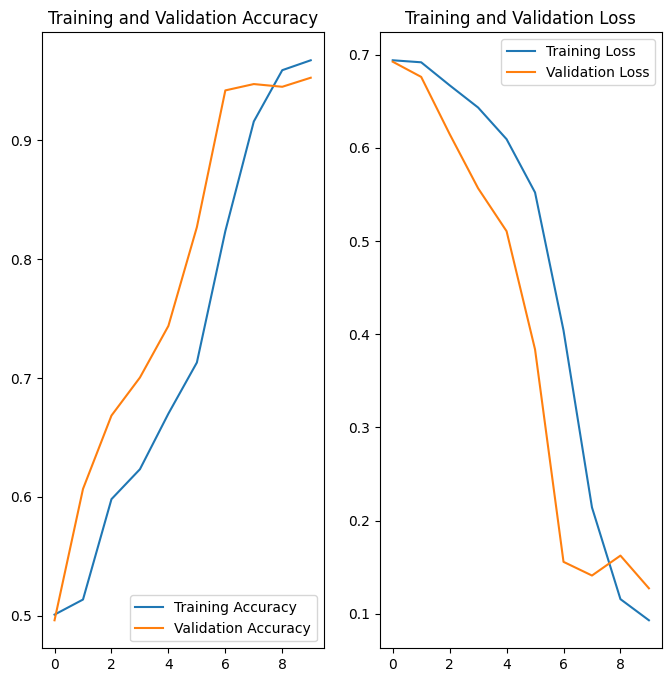

In [15]:
# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
     

In [16]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
model.save('forg.h5')


In [18]:
# Load the saved mod
import tensorflow as tf

loaded_model = tf.keras.models.load_model('forg.h5')

# Verify the loaded model architecture
loaded_model.summary()





Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 100)         │          57,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 130)         │         117,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 130)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6370)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,261,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 426)                 │         218,538 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 426)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 300)                 │         128,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             301 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,803,115 (14.51 MB)

 Trainable params: 3,803,113 (14.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Common IDs: {'28', '52', '49', '32', '10', '24', '14', '33', '30', '40', '36', '38', '1', '37', '7', '15', '6', '26', '43', '45', '17', '42', '54', '19', '55', '29', '27', '2', '50', '9', '12', '51', '5', '35', '20', '11', '16', '25', '18', '39', '8', '31', '53', '22', '44', '47', '48', '41', '46', '4', '13', '21', '3', '23', '34'}


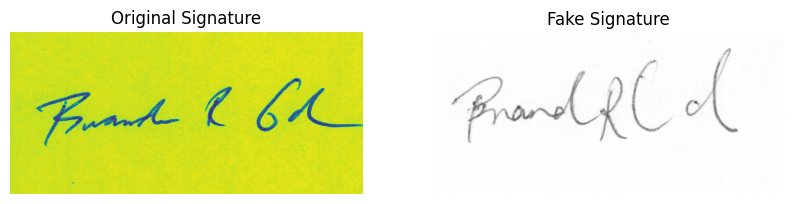

In [8]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Function to display image
def display_image(image_path, title):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

# Set your dataset paths
real_dir = 'C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/train/full_org'
fake_dir = 'C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/train/full_forg'

# List all PNG files
real_files = [f for f in os.listdir(real_dir) if f.endswith('.png')]
fake_files = [f for f in os.listdir(fake_dir) if f.endswith('.png')]

# Extract person ID from filenames like "original_1_1.png"
def get_id(filename):
    parts = filename.split('_')
    return parts[1] if len(parts) > 2 else None

# Collect person IDs from both sets
real_ids = set(get_id(f) for f in real_files)
fake_ids = set(get_id(f) for f in fake_files)

# Find matching IDs
common_ids = real_ids & fake_ids
print("Common IDs:", common_ids)

if not common_ids:
    raise ValueError("No matching original and fake signature pairs found.")

# Pick one common ID at random
selected_id = random.choice(list(common_ids))

# Filter real/fake images with that ID
real_matches = [os.path.join(real_dir, f) for f in real_files if get_id(f) == selected_id]
fake_matches = [os.path.join(fake_dir, f) for f in fake_files if get_id(f) == selected_id]

# Randomly pick one image from each
real_image_path = random.choice(real_matches)
fake_image_path = random.choice(fake_matches)

# Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
display_image(real_image_path, 'Original Signature')

plt.subplot(1, 2, 2)
display_image(fake_image_path, 'Fake Signature')

plt.show()


(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


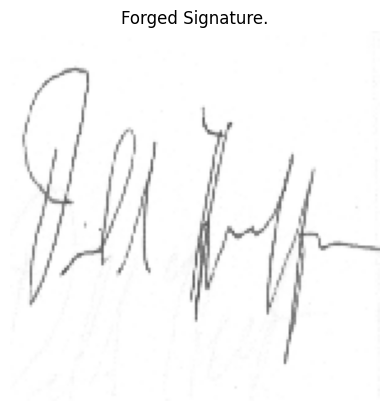

In [9]:
# Load the saved model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt


model = tf.keras.models.load_model('forg.h5')

# Import the image module from keras.preprocessing
from tensorflow.keras.preprocessing import image

# Function to preprocess the image
def preprocess_image(img_path, target_size=(150, 150)): # Change to the original training input size
    # Check if the provided path is a directory
    if os.path.isdir(img_path):
        # If it's a directory, list the files inside
        files = os.listdir(img_path)
        # Select the first image file (you might want to adjust this based on your directory structure)
        if files:
            img_path = os.path.join(img_path, files[0])
        else:
            raise ValueError("The provided directory is empty.")

    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    return img_array, img

# Example image path (replace with your actual image path)
img_path = 'C:/Users/aravi/OneDrive/Desktop/tillu/cedardataset/train/full_forg'

# Preprocess the image
img_array, img = preprocess_image(img_path)

# Print the shape of the preprocessed image to verify
print(img_array.shape)

# Make predictions
prediction = model.predict(img_array)

# Since it's a binary classification (real or fake), we use a threshold of 0.5
if prediction < 0.5:
    result = "Forged"
else:
    result = "Original"

# Display the image with the classification result
plt.imshow(img)
plt.title(f'{result} Signature.')
plt.axis('off')  # Hide the axis
plt.show()

In [6]:
# Define the VGG16 model
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.applications import VGG16
vgg16_model = Sequential()
from tensorflow.keras.layers import Dense, Dropout, Flatten


pretrained_vgg16 = tf.keras.applications.VGG16(include_top=False, input_shape=(64, 64, 3), pooling='avg', weights='imagenet')

for layer in pretrained_vgg16.layers:
    layer.trainable = False

vgg16_model.add(pretrained_vgg16)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation='relu'))
vgg16_model.add(Dense(450, activation='relu'))
vgg16_model.add(Dense(260, activation='relu'))
vgg16_model.add(Dense(1, activation='sigmoid'))
vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train_dir = r'C:\Users\aravi\OneDrive\Desktop\tillu\cedardataset\train'
test_dir = r'C:\Users\aravi\OneDrive\Desktop\tillu\cedardataset\test'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator_augmented = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='binary'
)


Found 10560 images belonging to 2 classes.
Found 2640 images belonging to 2 classes.


In [8]:
 # Calculate steps_per_epoch and validation_steps based on the size of your dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import tensorflow as tf
import os


vgg16_model = Sequential()
pretrained_vgg16 = tf.keras.applications.VGG16(include_top=False, input_shape=(64, 64, 3), pooling='avg', weights='imagenet')

for layer in pretrained_vgg16.layers:
    layer.trainable = False

vgg16_model.add(pretrained_vgg16)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation='relu'))
vgg16_model.add(Dense(450, activation='relu'))
vgg16_model.add(Dense(260, activation='relu'))
vgg16_model.add(Dense(1, activation='sigmoid'))

vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

steps_per_epoch = train_generator_augmented.samples // train_generator_augmented.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

# Fallback to at least 1
steps_per_epoch = max(steps_per_epoch, 1)
validation_steps = max(validation_steps, 1)


In [9]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths
train_dir = r'C:\Users\aravi\OneDrive\Desktop\tillu\cedardataset\train'
test_dir = r'C:\Users\aravi\OneDrive\Desktop\tillu\cedardataset\test'

# Check structure
print("Train subfolders:", os.listdir(train_dir))
print("Test subfolders:", os.listdir(test_dir))

# Image generators
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator_augmented = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='binary'
)

# Confirm generator creation
print("Train samples:", train_generator_augmented.samples)
print("Test samples:", test_generator.samples)


Train subfolders: ['full_forg', 'full_org']
Test subfolders: ['full_forg', 'full_org']
Found 10560 images belonging to 2 classes.
Found 2640 images belonging to 2 classes.
Train samples: 10560
Test samples: 2640


In [10]:
steps_per_epoch = max(train_generator_augmented.samples // train_generator_augmented.batch_size, 1)
validation_steps = max(test_generator.samples // test_generator.batch_size, 1)



In [11]:

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history_vgg16 = vgg16_model.fit(
    train_generator_augmented,
    steps_per_epoch=steps_per_epoch,
    epochs=10,  # Change to higher for real training
    validation_data=test_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose=2
)


Epoch 1/10
165/165 - 252s - 2s/step - accuracy: 0.8236 - loss: 0.3814 - val_accuracy: 0.8780 - val_loss: 0.2784
Epoch 2/10
165/165 - 230s - 1s/step - accuracy: 0.9121 - loss: 0.2154 - val_accuracy: 0.9184 - val_loss: 0.1913
Epoch 3/10
165/165 - 219s - 1s/step - accuracy: 0.9399 - loss: 0.1538 - val_accuracy: 0.9501 - val_loss: 0.1302
Epoch 4/10
165/165 - 226s - 1s/step - accuracy: 0.9528 - loss: 0.1196 - val_accuracy: 0.9630 - val_loss: 0.1003
Epoch 5/10
165/165 - 264s - 2s/step - accuracy: 0.9630 - loss: 0.0966 - val_accuracy: 0.9768 - val_loss: 0.0686
Epoch 6/10
165/165 - 266s - 2s/step - accuracy: 0.9614 - loss: 0.1034 - val_accuracy: 0.9619 - val_loss: 0.0951
Epoch 7/10
165/165 - 237s - 1s/step - accuracy: 0.9703 - loss: 0.0797 - val_accuracy: 0.9798 - val_loss: 0.0556
Epoch 8/10
165/165 - 243s - 1s/step - accuracy: 0.9704 - loss: 0.0753 - val_accuracy: 0.9764 - val_loss: 0.0593
Epoch 9/10
165/165 - 232s - 1s/step - accuracy: 0.9719 - loss: 0.0758 - val_accuracy: 0.9840 - val_loss:

In [12]:
loss, accuracy = vgg16_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss * 100:.2f}%")

42/42 ━━━━━━━━━━━━━━━━━━━━ 28s 669ms/step - accuracy: 0.9815 - loss: 0.0567
Test Accuracy: 98.41%
Test Loss: 4.89%


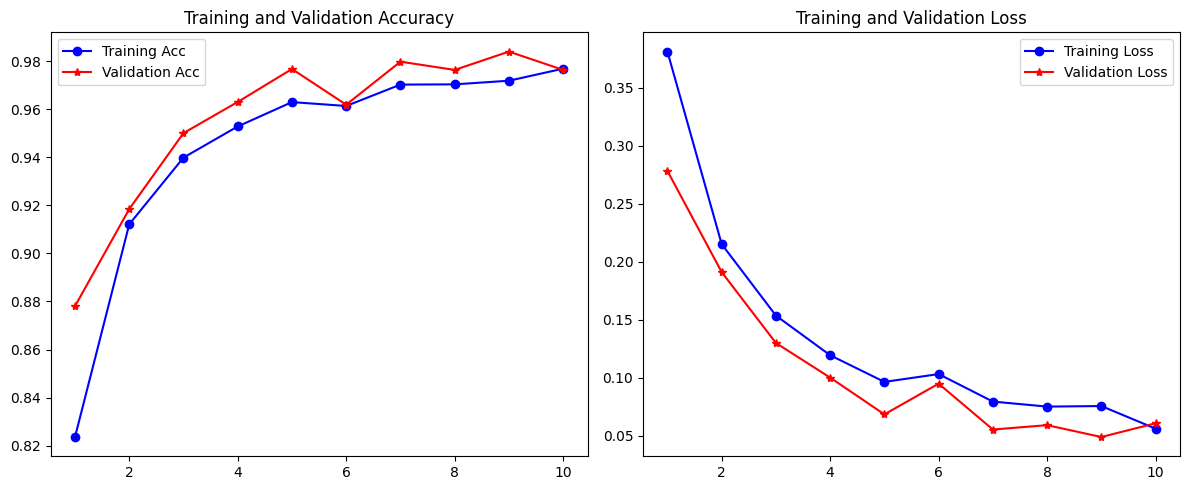

In [14]:
import matplotlib.pyplot as plt

acc = history_vgg16.history['accuracy']
val_acc = history_vgg16.history['val_accuracy']
loss = history_vgg16.history['loss']
val_loss = history_vgg16.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Acc')
plt.plot(epochs, val_acc, 'r*-', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
# Save the VGG16 model
vgg16_model.save('arun.h5')

In [16]:
vgg16_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 450)                 │         230,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 260)                 │         117,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             261 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,547,771 (63.12 MB)

 Trainable params: 611,027 (2.33 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,222,056 (4.66 MB)